# Check the solutions to eq. 19.

4 January 2024

## Setup the integral

In [1]:
import numpy as np

f = 0.6  # Fraction of e neutrinos (60%)
g = 0.4  # Fraction of x neutrinos (40%)

B = np.array([0, 0, 1])
omega = np.array([0.1, 0.2])
theta = 0.1
mu = 1
gamma = 0.01
t_final = 5000

def integrand(t, y, extra_term=False):
    e, x = y.reshape((2, 3))
    
    b = f*e + g*x
    
    de = np.cross(-omega[0]*B + mu*b, e) - 4/3*gamma*mu*(e - b) - 2/3*gamma*mu * np.cross(b, np.cross(b, e))
    dx = np.cross(-omega[1]*B + mu*b, x) - 4/3*gamma*mu*(x - b) - 2/3*gamma*mu * np.cross(b, np.cross(b, x))

    if extra_term:
        de = de - 2/3*gamma*mu * np.cross(np.cross(e, b), e)
        dx = dx - 2/3*gamma*mu * np.cross(np.cross(x, b), x)

    dy = np.concatenate([de, dx])
    return dy

## Do the integral

In [2]:
from scipy.integrate import solve_ivp

y0 = np.array([
    [0, np.sin(theta), np.cos(theta)],
    [0, -np.sin(theta), -np.cos(theta)]
]).flatten()

sol1 = solve_ivp(integrand, (0, t_final), y0, args=[False])
sol2 = solve_ivp(integrand, (0, t_final), y0, args=[True])

e1, x1 = sol1.y.reshape((2, 3, -1))
e2, x2 = sol2.y.reshape((2, 3, -1))

mean1 = (f*e1 + g*x1)
mean2 = (f*e2 + g*x2)

## Plots

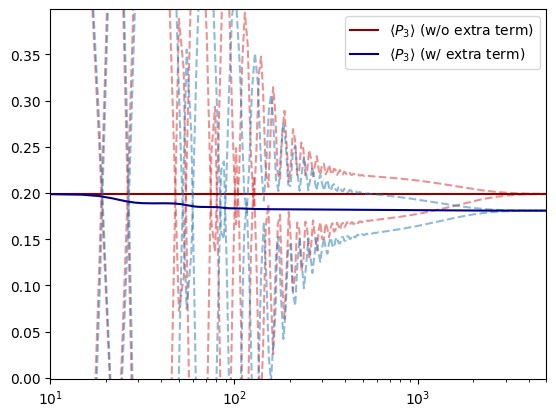

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sol1.t, e1[2], ls='--', c='tab:red', alpha=0.5)
plt.plot(sol1.t, x1[2], ls='--', c='tab:red', alpha=0.5)
plt.plot(sol1.t, mean1[2], label=r"$\langle P_3 \rangle$ (w/o extra term)", c='darkred')

# plt.figure()
plt.plot(sol2.t, e2[2], ls='--', c='tab:blue', alpha=0.5)
plt.plot(sol2.t, x2[2], ls='--', c='tab:blue', alpha=0.5)
plt.plot(sol2.t, mean2[2], label=r"$\langle P_3 \rangle$ (w/ extra term)", c='darkblue')

window = 0.2
plt.ylim(mean1[2, 0] - window, mean1[2, 0] + window)

plt.xscale('log')
plt.xlim(1e1, t_final)

plt.legend()